In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
def true_fun(x):
    return np.cos(1.5 * np.pi * x)

np.random.seed(0)

n_samples = 30
degrees = [1, 2, 3, 4, 15, 20, 30]

x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1

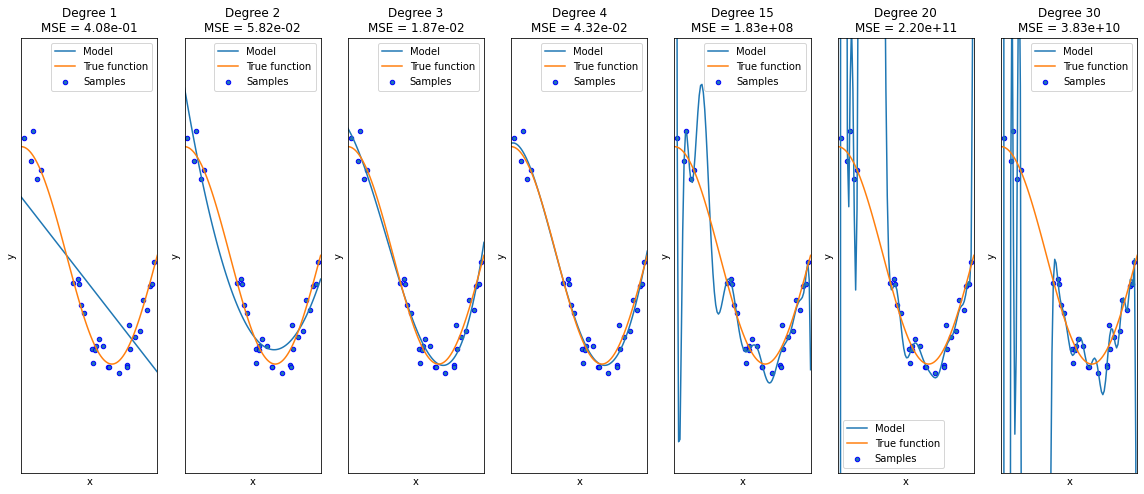

In [3]:
plt.figure(figsize=(20, 8))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    #linear_regression = Ridge()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, x[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label="Model")
    plt.plot(x_test, true_fun(x_test), label="True function")
    plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}".format(degrees[i], -scores.mean()))
    
plt.show()

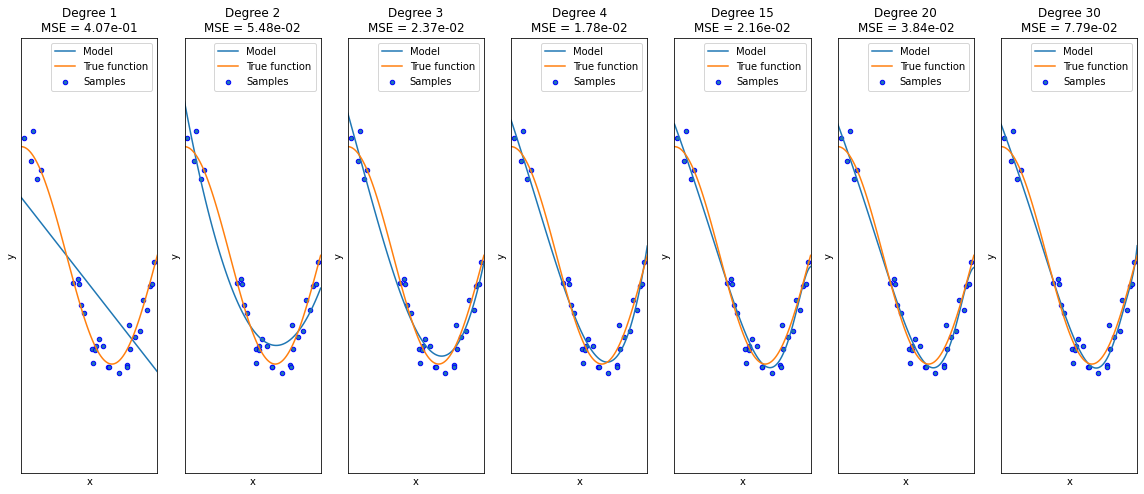

In [4]:
plt.figure(figsize=(20, 8))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = Ridge(alpha=0.01)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, x[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label="Model")
    plt.plot(x_test, true_fun(x_test), label="True function")
    plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}".format(degrees[i], -scores.mean()))
    
plt.show()

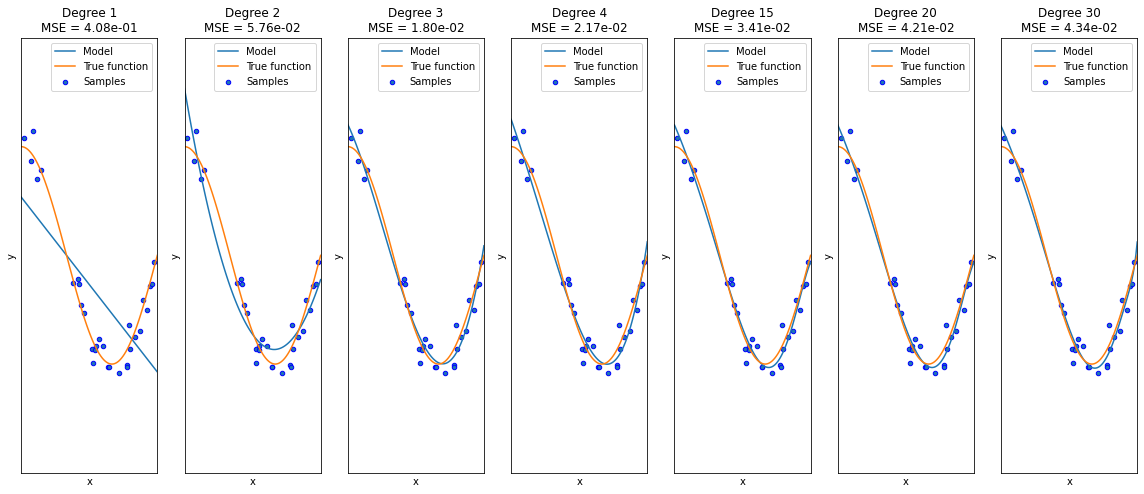

In [5]:
plt.figure(figsize=(20, 8))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = Lasso(alpha=0.0001, max_iter=10_000)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, x[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label="Model")
    plt.plot(x_test, true_fun(x_test), label="True function")
    plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}".format(degrees[i], -scores.mean()))
    
plt.show()